In [1]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
import numpy as np

In [2]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
%matplotlib inline
from skimage import color, transform

from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import accuracy_score

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

#from torchvision import datasets

from IPython.display import clear_output

In [3]:
def normalize(x, max_value):
    """ If x takes its values between 0 and max_value, normalize it between -1 and 1"""
    return (x / float(max_value)) * 2 - 1

In [4]:
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


In [5]:
def transform_mnist(X):
    X = X.reshape(len(X), 28, 28)
    X = np.array([transform.resize(im, [32,32]) for im in X])
    X = normalize(X, 1)
    #X = X.reshape(len(X), 1024)
    
    return X

In [6]:
print("Transforming MNIST train...")
X_mnist_train = transform_mnist(mnist.train.images)

print("Transforming MNIST test...")
X_mnist_test = transform_mnist(mnist.test.images)

Transforming MNIST train...


/home/ecbm4040/miniconda3/envs/dlenv/lib/python3.6/site-packages/skimage/transform/_warps.py:105: UserWarning: The default mode, 'constant', will be changed to 'reflect' in skimage 0.15.
  warn("The default mode, 'constant', will be changed to 'reflect' in "
/home/ecbm4040/miniconda3/envs/dlenv/lib/python3.6/site-packages/skimage/transform/_warps.py:110: UserWarning: Anti-aliasing will be enabled by default in skimage 0.15 to avoid aliasing artifacts when down-sampling images.
  warn("Anti-aliasing will be enabled by default in skimage 0.15 to "


Transforming MNIST test...


In [7]:
lb_mnist = LabelBinarizer()

Y_mnist_train = lb_mnist.fit_transform(mnist.train.labels)
Y_mnist_test = lb_mnist.fit_transform(mnist.test.labels)

X_target = X_mnist_train
X_target_test = X_mnist_test
Y_target_test = Y_mnist_test

from scipy.io import loadmat
import numpy as np
import sys

def load_data(path):
    """ Helper function for loading a MAT-File"""
    data = loadmat(path)
    return data['X'], data['y']

svhn_train_image, svhn_train_label = load_data('/home/ecbm4040/final_project/data/svhn/train_32x32.mat')
svhn_test_image, svhn_test_label = load_data('/home/ecbm4040/final_project/data/svhn/test_32x32.mat')

svhn_train_image,svhn_train_label = svhn_train_image.transpose((3,0,1,2)), svhn_train_label[:,0]
svhn_test_image,svhn_test_label = svhn_test_image.transpose((3,0,1,2)), svhn_test_label[:,0]

svhn_train_label[svhn_train_label == 10] = 0
svhn_test_label[svhn_test_label == 10] = 0

nb_classes = 10

def indices_to_one_hot(data, nb_classes):
    """Convert an iterable of indices to one-hot encoded labels."""
    targets = np.array(data).reshape(-1)
    return np.eye(nb_classes)[targets]

svhn_train_label_hot = indices_to_one_hot(svhn_train_label.astype(int), nb_classes)
svhn_test_label_hot = indices_to_one_hot(svhn_test_label.astype(int), nb_classes)

# Calculate the total number of images
num_images = svhn_train_image.shape[0] + svhn_test_label.shape[0]

In [8]:
def rgb2gray(images):
    return np.expand_dims(np.dot(images, [0.2990, 0.5870, 0.1140]), axis=3)
svhn_train_image_greyscale = rgb2gray(svhn_train_image).astype(np.float32)
svhn_test_image_greyscale = rgb2gray(svhn_test_image).astype(np.float32)

ind_1 = np.random.choice(73257, 60000, replace = False)
ind_2 = np.random.choice(16032, 5000, replace = False)

svhn_tr_im = svhn_train_image_greyscale[ind_1,:,:]
svhn_tr_im = np.reshape(svhn_tr_im, (-1, 1024))
svhn_ts_im = svhn_test_image_greyscale[ind_2,:,:]
svhn_ts_im = np.reshape(svhn_ts_im, (-1, 1024))
svhn_tr_label = svhn_train_label_hot[ind_1,:]
svhn_ts_label = svhn_test_label_hot[ind_2,:]

ind_3 = np.random.choice(55000, 20000, replace = False)
ind_4 = np.random.choice(10000, 5000, replace = False)

X_target = X_target[ind_3,:,:]
X_target = np.reshape(X_target, (-1, 1024))
mnist_train_label = mnist.train.labels
mnist_train_label = mnist_train_label[ind_3,:]
X_target_test = X_target_test[ind_4,:,:]
X_target_test = np.reshape(X_target_test, (-1, 1024))
Y_target_test = Y_target_test[ind_4,:]


In [9]:
from mcd_svhn import *

In [10]:
filter_size = 5
n_filters_1 = 64
n_filters_2 = 64
n_filters_3 = 128
n_units_g = 3072
n_units_c = 2048
#n_units_d_1 = 64
#n_units_d_2 = 64



learning_rate = 0.0002
epoch = 20
num_stepC = 2
#n_iter = 1000
batch_size = 64
show_step = 50




model_path = '/model'
#keep_prob = 0.8

images_train_1 = svhn_tr_im
labels_train_1 = svhn_tr_label
images_test_1 = svhn_ts_im
labels_test_1 = svhn_ts_label

images_train_t = X_target
labels_train_t = mnist_train_label
images_test_t = X_target_test
labels_test_t = Y_target_test

is_saving = False

 

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See @{tf.nn.softmax_cross_entropy_with_logits_v2}.

number of batches for training: 312
epoch 1 
---------------
Iteration: 0, Loss_test_a: 4.5976041326156025, Loss_test_b: 4.566765928879763, Loss_test_c: 0.028568089097881548
Source test acc1: 17.022235576923077%, Source test acc2: 16.6015625%.
Best test accuracy classifier1! Iteration:0 accuracy: 8.483573717948719%
Best test accuracy classifier2! Iteration:0 accuracy: 9.079527243589745%
---------------
Iteration: 50, Loss_test_a: 2.181668208577694, Loss_test_b: 2.176893943777451, Loss_test_c: 0.0069938926996352775
Source test acc1: 65.61999198717949%, Source test acc2: 65.44471153846155%.
Best test accuracy classifier1! Iteration:50 accuracy: 59.22475961538461%
Best test accuracy classifier2! Iteration:50 accuracy: 58.72896634615385%
---------------
Iteration: 100, Loss_test_a: 1.657501342969063, 

---------------
Iteration: 1236, Loss_test_a: 0.9046265004346004, Loss_test_b: 0.9024168389538924, Loss_test_c: 0.0003507255192884119
Source test acc1: 86.20292467948718%, Source test acc2: 86.39322916666666%.
epoch 5 
---------------
Iteration: 1248, Loss_test_a: 0.8827089270911156, Loss_test_b: 0.8882107348778309, Loss_test_c: 0.0003010377800843017
Source test acc1: 86.58353365384616%, Source test acc2: 86.54847756410257%.
---------------
Iteration: 1298, Loss_test_a: 0.9627302927084458, Loss_test_b: 0.9598890237319164, Loss_test_c: 0.00034367897355061874
Source test acc1: 85.26141826923077%, Source test acc2: 85.37159455128204%.
---------------
Iteration: 1348, Loss_test_a: 0.9287168967227141, Loss_test_b: 0.9291402616370947, Loss_test_c: 0.00032169842038106604
Source test acc1: 86.30308493589743%, Source test acc2: 86.06270032051282%.
---------------
Iteration: 1398, Loss_test_a: 0.8832134650303767, Loss_test_b: 0.8862176615840349, Loss_test_c: 0.0002752783965055035
Source test acc

---------------
Iteration: 2858, Loss_test_a: 0.8315466129435942, Loss_test_b: 0.83377522841478, Loss_test_c: 0.00021648886124053088
Source test acc1: 88.11598557692307%, Source test acc2: 88.05588942307693%.
---------------
Iteration: 2908, Loss_test_a: 0.8289031687264259, Loss_test_b: 0.8274961518935668, Loss_test_c: 0.00019002378259977914
Source test acc1: 87.66025641025641%, Source test acc2: 87.83052884615384%.
---------------
Iteration: 2958, Loss_test_a: 0.7527973529620048, Loss_test_b: 0.7556269810749934, Loss_test_c: 0.0002343382517321329
Source test acc1: 88.9072516025641%, Source test acc2: 89.15765224358975%.
---------------
Iteration: 3008, Loss_test_a: 0.8795062964543318, Loss_test_b: 0.8694913586935936, Loss_test_c: 0.00024273447317495875
Source test acc1: 87.12439903846155%, Source test acc2: 87.00420673076923%.
---------------
Iteration: 3058, Loss_test_a: 0.8296688684286215, Loss_test_b: 0.819474901812963, Loss_test_c: 0.0002554845767777946
Source test acc1: 87.660256

---------------
Iteration: 4568, Loss_test_a: 0.7885644781665925, Loss_test_b: 0.7900756906049374, Loss_test_c: 0.00023986728038567098
Source test acc1: 88.5516826923077%, Source test acc2: 88.57672275641025%.
Best test accuracy classifier1! Iteration:4568 accuracy: 88.60677083333334%
---------------
Iteration: 4618, Loss_test_a: 0.7957501273888808, Loss_test_b: 0.7941605184131708, Loss_test_c: 0.00019923387509671113
Source test acc1: 88.58673878205127%, Source test acc2: 88.66686698717949%.
---------------
Iteration: 4668, Loss_test_a: 0.7705016155273486, Loss_test_b: 0.7743494283312407, Loss_test_c: 0.00020407198665231053
Source test acc1: 89.00741185897436%, Source test acc2: 88.8671875%.
epoch 16 
---------------
Iteration: 4680, Loss_test_a: 0.7829777707274144, Loss_test_b: 0.7838959660476599, Loss_test_c: 0.00027443134428185894
Source test acc1: 88.99238782051282%, Source test acc2: 88.9072516025641%.
---------------
Iteration: 4730, Loss_test_a: 0.7948678050858852, Loss_test_b: 

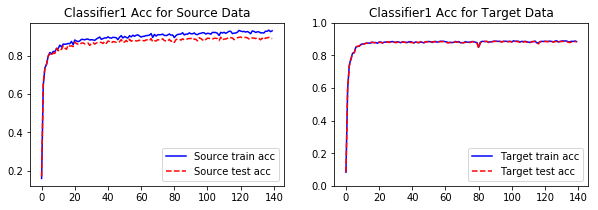

---------------


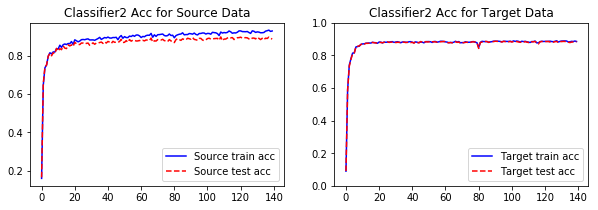

In [11]:
mcd = MCD_DA()
mcd.train(images_train_1=images_train_1, labels_train_1=labels_train_1, images_test_1=images_test_1, labels_test_1=labels_test_1, \
          images_train_t=images_train_t, labels_train_t=labels_train_t, images_test_t=images_test_t, labels_test_t=labels_test_t, \
          filter_size=filter_size, n_filters_1=n_filters_1, n_filters_2=n_filters_2, n_filters_3 = n_filters_3, n_units_g=n_units_g, n_units_c = n_units_c, \
          learning_rate = learning_rate, epoch = epoch, num_stepC = num_stepC, batch_size = batch_size, show_step = show_step, \
          is_saving = is_saving, model_path = model_path)